In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df=pd.read_csv(r'airQualityData.csv')
df

,Unnamed: 0,date,cityname,citycode,SO2,NO2,PM10,CO,O3_8,PM25,...,airPressure,sunHours,highTemperature,lowHumidity,year,month,season,longitude,latitude,day
0,0,4/1/2017,city1,110000,7,52,78,0.6,86,31,...,1012.80,11.4,22.2,13,2017,4,2,116.407526,39.904030,1
1,1,4/2/2017,city1,110000,14,72,112,1.1,96,68,...,1014.15,10.4,23.1,14,2017,4,2,116.407526,39.904030,2
2,2,4/3/2017,city1,110000,21,78,170,1.2,158,125,...,1013.38,10.2,25.5,19,2017,4,2,116.407526,39.904030,3
3,3,4/4/2017,city1,110000,20,62,147,1.1,100,130,...,1011.10,0.0,20.2,32,2017,4,2,116.407526,39.904030,4
4,4,4/5/2017,city1,110000,5,30,57,0.6,132,61,...,1008.88,5.6,20.0,45,2017,4,2,116.407526,39.904030,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71143,71143,7/27/2020,city108,611000,9,12,42,0.4,105,14,...,920.80,11.5,35.2,33,2020,7,3,109.940477,33.870422,27
71144,71144,7/28/2020,city108,611000,11,16,40,0.6,82,18,...,923.40,10.0,30.5,48,2020,7,3,109.940477,33.870422,28
71145,71145,7/29/2020,city108,611000,12,16,39,0.6,99,22,...,924.90,11.6,31.3,51,2020,7,3,109.940477,33.870422,29
71146,71146,7/30/2020,city108,611000,12,16,40,0.6,100,22,...,926.10,10.2,30.0,47,2020,7,3,109.940477,33.870422,30


In [3]:
ss=df.groupby('cityname')
dfx=df[['cityname','SO2','NO2','PM10','CO','O3_8']]
dfy=df[['PM25']]

In [4]:
dfx = pd.get_dummies(data=dfx, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.6,random_state=0)
x_train

,SO2,NO2,PM10,CO,O3_8,cityname_city10,cityname_city100,cityname_city101,cityname_city102,cityname_city103,...,cityname_铜陵市,cityname_镇江市,cityname_长治市,cityname_阜阳市,cityname_阳泉市,cityname_青岛市,cityname_马鞍山市,cityname_驻马店市,cityname_鹤壁市,cityname_黄山市
40132,13,24,62,0.5,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24163,6,23,48,0.5,86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29142,5,24,68,0.6,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25730,6,26,54,0.6,176,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14659,17,31,64,0.6,224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,24,71,0.9,226,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45891,56,35,137,1.2,139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,17,21,50,0.8,91,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,8,43,64,0.5,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
hf=x_train
hf['PM25']=y_train
hf

,SO2,NO2,PM10,CO,O3_8,cityname_city10,cityname_city100,cityname_city101,cityname_city102,cityname_city103,...,cityname_镇江市,cityname_长治市,cityname_阜阳市,cityname_阳泉市,cityname_青岛市,cityname_马鞍山市,cityname_驻马店市,cityname_鹤壁市,cityname_黄山市,PM25
40132,13,24,62,0.5,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48
24163,6,23,48,0.5,86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
29142,5,24,68,0.6,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
25730,6,26,54,0.6,176,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
14659,17,31,64,0.6,224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,24,71,0.9,226,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
45891,56,35,137,1.2,139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69
42613,17,21,50,0.8,91,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
43567,8,43,64,0.5,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [7]:
s_to=hf.sample(100)
s_y=s_to['PM25']
s_y

65254    39
66661    23
14532    24
17940    44
47790    65
         ..
17394    17
7462     71
30538    28
26214    24
39468    24
Name: PM25, Length: 100, dtype: int64

In [8]:
s_x= s_to.drop('PM25', 1)
s_x

C:\Users\rafie\AppData\Local\Temp/ipykernel_11960/4200094892.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  s_x= s_to.drop('PM25', 1)


,SO2,NO2,PM10,CO,O3_8,cityname_city10,cityname_city100,cityname_city101,cityname_city102,cityname_city103,...,cityname_铜陵市,cityname_镇江市,cityname_长治市,cityname_阜阳市,cityname_阳泉市,cityname_青岛市,cityname_马鞍山市,cityname_驻马店市,cityname_鹤壁市,cityname_黄山市
65254,8,51,83,0.6,110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66661,11,27,57,0.7,68,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14532,20,35,48,0.8,168,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17940,5,40,63,0.9,189,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47790,42,47,141,1.2,81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,6,14,44,0.6,105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7462,9,21,81,0.9,124,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30538,6,18,82,0.7,141,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,8,28,32,0.8,147,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Correcting x_train feature number. Run Train test split once again.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.6,random_state=0)
x_train

,SO2,NO2,PM10,CO,O3_8,cityname_city10,cityname_city100,cityname_city101,cityname_city102,cityname_city103,...,cityname_铜陵市,cityname_镇江市,cityname_长治市,cityname_阜阳市,cityname_阳泉市,cityname_青岛市,cityname_马鞍山市,cityname_驻马店市,cityname_鹤壁市,cityname_黄山市
40132,13,24,62,0.5,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24163,6,23,48,0.5,86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29142,5,24,68,0.6,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25730,6,26,54,0.6,176,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14659,17,31,64,0.6,224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,24,71,0.9,226,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45891,56,35,137,1.2,139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,17,21,50,0.8,91,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,8,43,64,0.5,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
samp=x_train.sample(100)
samp

,SO2,NO2,PM10,CO,O3_8,cityname_city10,cityname_city100,cityname_city101,cityname_city102,cityname_city103,...,cityname_铜陵市,cityname_镇江市,cityname_长治市,cityname_阜阳市,cityname_阳泉市,cityname_青岛市,cityname_马鞍山市,cityname_驻马店市,cityname_鹤壁市,cityname_黄山市
42404,12,28,62,1.2,103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5282,7,26,32,0.4,142,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41227,12,20,97,0.6,113,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66572,16,18,74,1.5,184,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3135,8,26,43,0.4,138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,9,30,47,0.4,106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9165,6,40,75,0.9,150,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62756,6,17,30,0.5,81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67618,4,26,64,0.6,169,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Random Forest


In [11]:
from sklearn.ensemble import RandomForestRegressor
mlr = RandomForestRegressor(n_estimators=100, random_state=0)
mlr.fit(x_train, y_train)

C:\Users\rafie\AppData\Local\Temp/ipykernel_11960/1016289169.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mlr.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [12]:
yrf_pred = mlr.predict(x_test)
yrf_pred

array([27.  , 25.34, 18.13, ..., 34.82, 30.6 , 23.63])

In [13]:
from sklearn.metrics import mean_absolute_error
print("MAE: "+str(mean_absolute_error(y_test,yrf_pred))) 

MAE: 6.002894656703131


In [14]:
from sklearn import linear_model
li1=linear_model.LinearRegression()
li1.fit(y_test,yrf_pred)

LinearRegression()

Text(0, 0.5, 'Predicted')

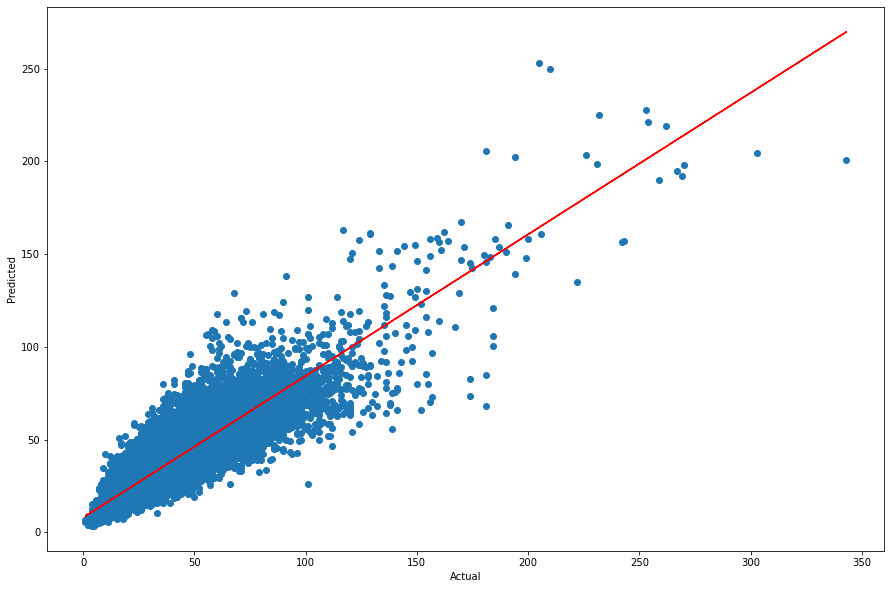

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,yrf_pred)
plt.plot(y_test,li1.predict(y_test),color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

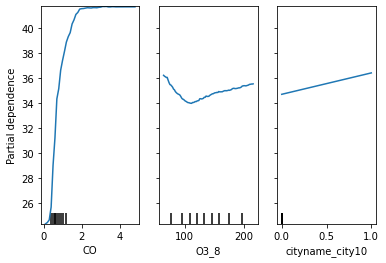

In [27]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(mlr, x_train, [3,4,5])

Feature: 0, Score: 27.63504
Feature: 1, Score: 35.74202
Feature: 2, Score: 415.37437
Feature: 3, Score: 81.67477
Feature: 4, Score: 36.28620
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.22075
Feature: 9, Score: 0.02772
Feature: 10, Score: 0.61460
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.17541
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.29376
Feature: 15, Score: 0.19217
Feature: 16, Score: -0.01672
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.63465
Feature: 19, Score: 3.85315
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.33063
Feature: 23, Score: 0.00000
Feature: 24, Score: 1.07554
Feature: 25, Score: 0.42823
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.38940
Feature: 28, Score: 0.56791
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.13560
Feature: 32, Score: 0.03816
Feature: 33, Score: 0.00000
Feature: 34, Score: 2.21367
Feature: 35, Score: 0.0

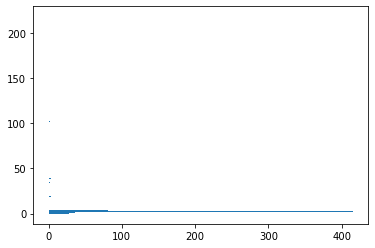

In [18]:
from sklearn.inspection import permutation_importance
results = permutation_importance(mlr, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:219]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh([s_x for s_x in range(len(importance))],importance)
plt.show()

Feature: 0, Score: 26.04342
Feature: 1, Score: 31.10216
Feature: 2, Score: 441.33198
Feature: 3, Score: 101.36147
Feature: 4, Score: 30.29384


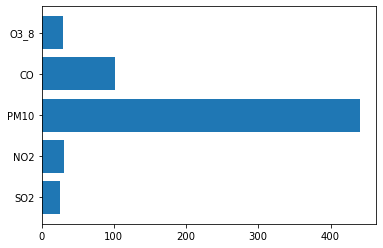

In [19]:
from sklearn.inspection import permutation_importance
results = permutation_importance(mlr, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:5]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh(indices,importance)
plt.show()

In [28]:
import shap
explainer=shap.TreeExplainer(mlr)

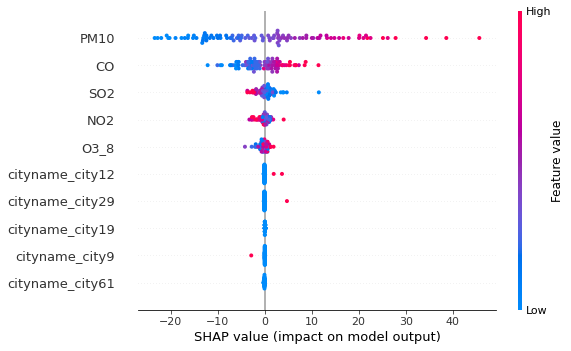

In [29]:
shap_values=explainer.shap_values(samp)
shap.summary_plot(shap_values,samp,max_display=10)

In [ ]:
#Gradient Boosting


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
mlg=GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, random_state=0)
mlg.fit(x_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingRegressor(n_estimators=20, random_state=0)

In [40]:
ygrad_pred = mlg.predict(x_test)
ygrad_pred

array([28.54698071, 24.01616923, 22.31045992, ..., 52.25868844,
       33.11493875, 28.54698071])

In [41]:
print("MAE: "+str(mean_absolute_error(y_test,ygrad_pred))) 

MAE: 7.141934327318337


In [42]:
li2=linear_model.LinearRegression()
li2.fit(y_test,ygrad_pred)

LinearRegression()

Text(0, 0.5, 'Predicted')

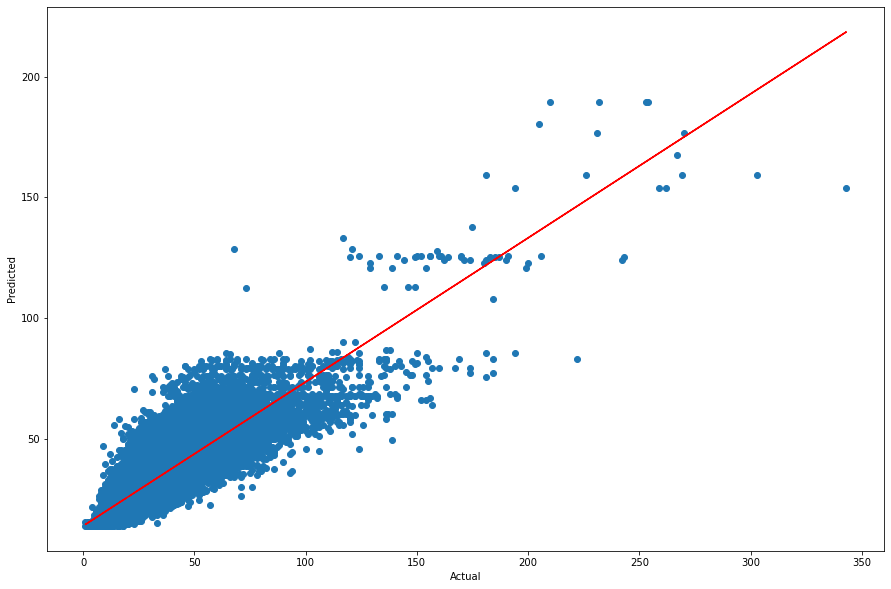

In [43]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,ygrad_pred)
plt.plot(y_test,li2.predict(y_test),color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

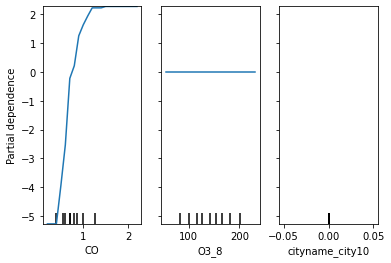

In [66]:
PartialDependenceDisplay.from_estimator(mlg, samp, [3,4,5])

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 304.59514
Feature: 3, Score: 72.94064
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000

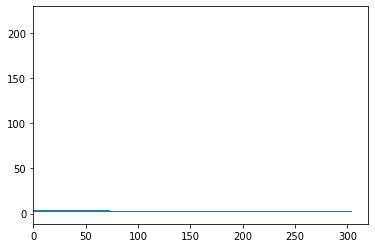

In [45]:
from sklearn.inspection import permutation_importance
results = permutation_importance(mlg, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:220]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh([s_x for s_x in range(len(importance))],importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 331.36537
Feature: 3, Score: 59.51813
Feature: 4, Score: 0.00000


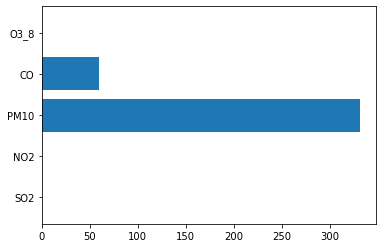

In [46]:
from sklearn.inspection import permutation_importance
results = permutation_importance(mlg, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:5]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh(indices,importance)
plt.show()

In [47]:
import shap
explainer2=shap.TreeExplainer(mlg)

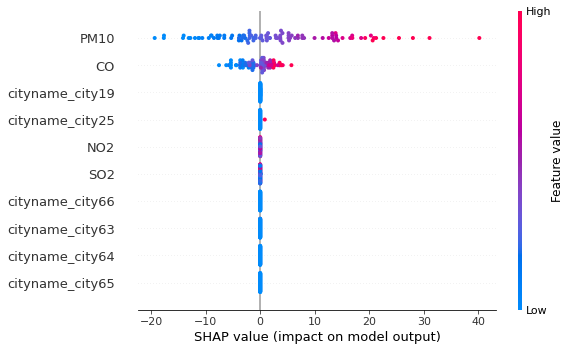

In [48]:
shap_values2=explainer2.shap_values(samp)
shap.summary_plot(shap_values2,samp,max_display=10)

In [ ]:
#Nural Network


In [49]:
from sklearn.neural_network import MLPRegressor
bra = MLPRegressor(hidden_layer_sizes=(10,8), random_state=0)
bra.fit(x_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


MLPRegressor(hidden_layer_sizes=(10, 8), random_state=0)

In [50]:
ynn_pred=bra.predict(x_test)
ynn_pred

array([24.60889577, 22.74695682, 14.98128519, ..., 48.96763281,
       31.1725353 , 21.74510717])

In [51]:
print("MAE: "+str(mean_absolute_error(y_test,ynn_pred))) 

MAE: 5.7267008182383305


In [52]:
li3=linear_model.LinearRegression()
li3.fit(y_test,ynn_pred)

LinearRegression()

Text(0, 0.5, 'Predicted')

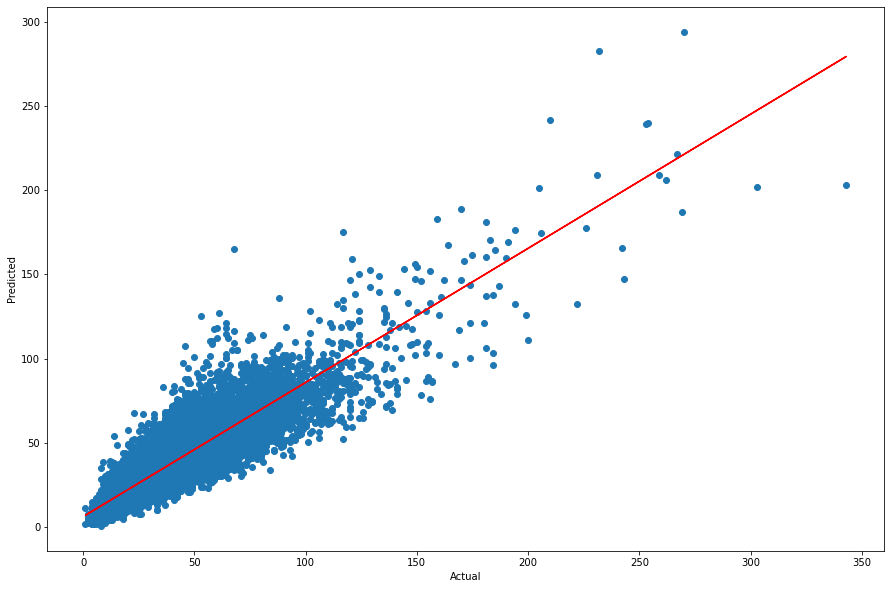

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,ynn_pred)
plt.plot(y_test,li3.predict(y_test),color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

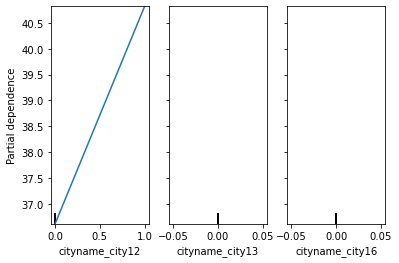

In [72]:
PartialDependenceDisplay.from_estimator(bra, samp, [16,17,20])

Feature: 0, Score: 12.80409
Feature: 1, Score: 2.13165
Feature: 2, Score: 461.36515
Feature: 3, Score: 139.15086
Feature: 4, Score: -4.08082
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.67957
Feature: 7, Score: 0.77596
Feature: 8, Score: 1.09774
Feature: 9, Score: 0.37166
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.02133
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.71353
Feature: 16, Score: 1.98786
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 6.68413


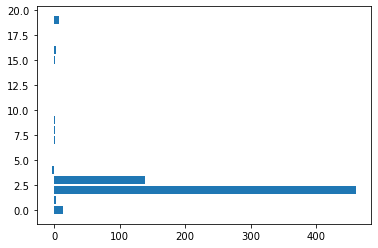

In [55]:
from sklearn.inspection import permutation_importance
results = permutation_importance(bra, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:20]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh([s_x for s_x in range(len(importance))],importance)
plt.show()

Feature: 0, Score: 8.58679
Feature: 1, Score: -0.45572
Feature: 2, Score: 420.23531
Feature: 3, Score: 120.61527
Feature: 4, Score: -4.09316


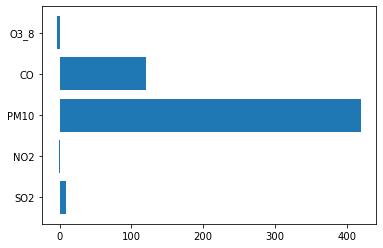

In [56]:
from sklearn.inspection import permutation_importance
results = permutation_importance(bra, s_x, s_y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
importance=importance[0:5]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices=['SO2','NO2','PM10','CO','O3_8']
plt.barh(indices,importance)
plt.show()

In [60]:
import shap
explainer3=shap.KernelExplainer(bra.predict,samp)

X does not have valid feature names, but MLPRegressor was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


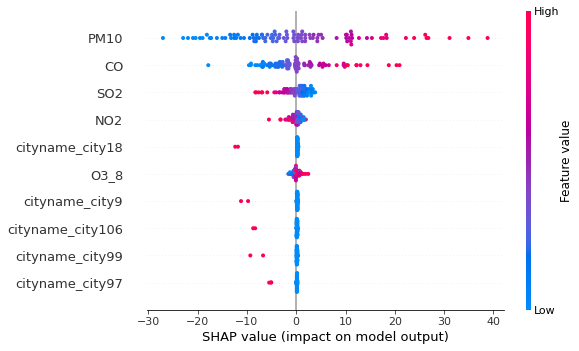

In [61]:
shap_values3=explainer3.shap_values(samp)
shap.summary_plot(shap_values3,samp,max_display=10)

In [ ]:
#Classifier


In [16]:
from sklearn.ensemble import RandomForestClassifier
mlrfc = RandomForestClassifier(n_estimators=20, random_state=0)
mlrfc.fit(x_train, y_train)

C:\Users\rafie\AppData\Local\Temp/ipykernel_11960/1107377546.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mlrfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=0)

In [17]:
yrfc_pred=mlrfc.predict(x_test)
yrfc_pred

array([26, 26, 23, ..., 23, 24, 22], dtype=int64)

In [19]:
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(mlrfc, x_test, y_test)
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestClassifier fit on multiclass (172 classes) data